# Audio Processing

Thanks to Colin Jemmott for UC San Diego, October 2018

Day 2:
* DIY speaking recognition (silence versus talking)
* IBM Open Source API for sound classification.

# Recorded Sounds

Import `data/first_sound.wav` as an array using the provided code.  Then look at some statistics, including min, max, mean, and some raw samples.  Perhaps even plot it!

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from scipy.io.wavfile import read
import numpy as np

# Read in wav file as an array
a = read("data/first_sound.wav")
samplingRate = a[0]
audioData = a[1]

array([   0,    0,   -1, ..., -172,  -78,  -23], dtype=int16)

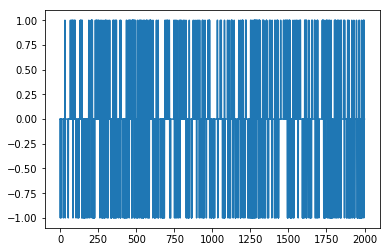

In [17]:
# Your code here
max(audioData)
min(audioData)
np.mean(audioData)
plt.plot(audioData[:2000])
audioData

Listen to audio from within the notebook using: `IPython.display.Audio`

In [25]:
from IPython import display
display.Audio(audioData, rate = samplingRate)

# Add Noise

Add noise to the recording, matching the maximum value of the recording to the maximum value of the noise.  Then use the provided code to store it as a wav file.  Download it and listen -- or listen to it in the notebook.

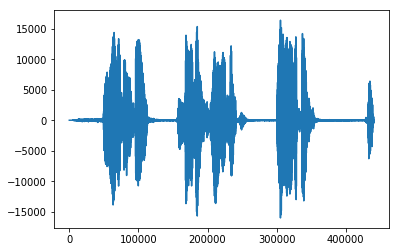

In [31]:
plt.plot(audioData)

In [44]:
s = np.random.uniform(-1, 1, size = audioData.size)
s

array([ 0.05734822,  0.36292099,  0.85183532, ...,  0.65524218,
       -0.85187188,  0.48911064])

array([ 1603.24184298, 13226.30371028,  7146.99548494, ...,
        1591.5280484 , 14243.9366014 , 11534.72208096])

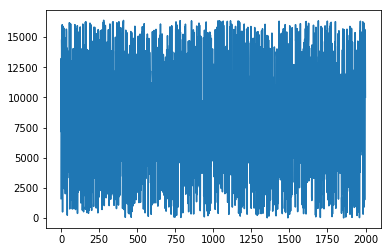

In [48]:
# Your code here
audioWithNoise = np.random.uniform(-1, max(audioData), size = audioData.size)
audioWithNoise
plt.plot(audioWithNoise[:2000])
display.Audio(audioWithNoise, rate = samplingRate)
audioWithNoise

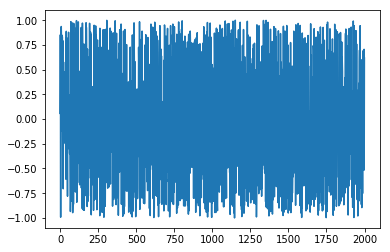

In [49]:
plt.plot(s[:2000])

In [39]:
display.Audio(s, rate = samplingRate)

In [46]:
from scipy.io.wavfile import write

# Store the noise as a wav file
scaled = np.int16(audioWithNoise/np.max(np.abs(audioWithNoise)) * 32767)
write('output_with_noise.wav', 44100, scaled)

In [47]:
display.Audio(scaled, rate = samplingRate)

# Trim the quiet parts

There are quite a few long pauses in the recording.  Using the first version, without the noise, write some code that will remove any pause longer than a half second.  Write down the wav file and see if it did what you thought.

array([], dtype=float64)

In [109]:
# your code here
trimmed = []
for i in range(audioData.size):
    if abs(audioData[i]) > 1000:
        trimmed.append(audioData[i])
trimmed


[1031,
 1034,
 1048,
 1067,
 1038,
 1043,
 1075,
 1085,
 1066,
 1007,
 -1070,
 -1167,
 -1242,
 -1297,
 -1336,
 -1362,
 -1377,
 -1383,
 -1380,
 -1365,
 -1351,
 -1346,
 -1350,
 -1360,
 -1383,
 -1412,
 -1432,
 -1445,
 -1463,
 -1484,
 -1490,
 -1485,
 -1489,
 -1506,
 -1516,
 -1510,
 -1512,
 -1535,
 -1552,
 -1538,
 -1507,
 -1488,
 -1467,
 -1426,
 -1380,
 -1354,
 -1339,
 -1315,
 -1300,
 -1331,
 -1389,
 -1415,
 -1389,
 -1365,
 -1375,
 -1378,
 -1323,
 -1234,
 -1163,
 -1108,
 -1048,
 -1001,
 -1043,
 -1100,
 -1168,
 -1266,
 -1380,
 -1449,
 -1430,
 -1334,
 -1196,
 -1023,
 -1117,
 -1262,
 -1294,
 -1223,
 -1050,
 1016,
 1055,
 1041,
 1057,
 1154,
 1190,
 1148,
 1084,
 1062,
 1073,
 1073,
 1074,
 1121,
 1218,
 1315,
 1380,
 1425,
 1452,
 1426,
 1329,
 1186,
 1032,
 1059,
 1168,
 1234,
 1269,
 1265,
 1200,
 1067,
 1006,
 1059,
 1058,
 1003,
 1090,
 1237,
 1321,
 1313,
 1212,
 1046,
 -1139,
 -1192,
 -1104,
 -1098,
 -1538,
 -1880,
 -2054,
 -2065,
 -1947,
 -1694,
 -1303,
 -1063,
 -1059,
 1089,
 1182,
 11

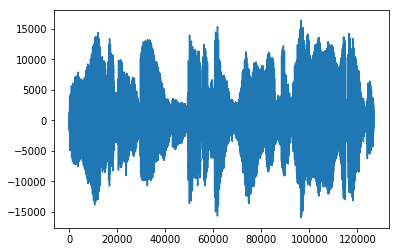

In [110]:
plt.plot(trimmed)

In [111]:
scaled = np.int16(trimmed/np.max(np.abs(trimmed)) * 32767)

write('output_without_quiet.wav', 44100, scaled)

In [112]:
display.Audio(scaled, rate = samplingRate)

In [114]:
trimmed_array = np.gradient(trimmed)
trimmed_gradient = np.gradient(trimmed_array)[0]
threshold = 10
trimmed_array[trimmed_gradient > threshold] = 0
trimmed_array[trimmed_gradient <= threshold] = 255
trimmed_array

array([255., 255., 255., ..., 255., 255., 255.])

# Speech recognition

This uses IBM's [MAX Audio Classifier](https://github.com/IBM/MAX-Audio-Classifier) deployed to an [Azure Container Instance](https://azure.microsoft.com/en-us/services/container-instances/) on Microsoft's cloud.  It took me less than ten minutes to get the docker container running in the cloud.  The classifier is [open source](https://github.com/IBM/MAX-Audio-Classifier) so you can modify it.  Better yet, there are [lots of other free open source models from IBM](https://developer.ibm.com/exchanges/models/) also!

You can read more about the ontology used for the training data [here](https://research.google.com/audioset/ontology/index.html).

In [70]:
import requests
import json

In [71]:
#curl -F "audio=@assets/thunder.wav" -XPOST http://localhost:5000/model/predict

fileName = "data/first_sound.wav"

url = "http://168.62.8.78:5000/model/predict"
files = {"audio":open(fileName, 'rb')}
r = requests.post(url, files=files)

In [72]:
json.loads(r.text)

{'predictions': [{'label': 'Speech',
   'label_id': '/m/09x0r',
   'probability': 0.8062254190444946},
  {'label': 'Fire alarm',
   'label_id': '/m/0c3f7m',
   'probability': 0.16118404269218445},
  {'label': 'Inside, small room',
   'label_id': '/t/dd00125',
   'probability': 0.08958666771650314},
  {'label': 'Tick-tock',
   'label_id': '/m/07qjznl',
   'probability': 0.05498076602816582},
  {'label': 'Narration, monologue',
   'label_id': '/m/02qldy',
   'probability': 0.05491876229643822}],
 'status': 'ok'}

### Now do the same thing with other wav files!  
* What happens if you use the one where you added noise?
* What happens if you take only a portion of an audio file?
* What happens if you mix the recordings together? 
* What happens if you speed up / slow down the recordings?

In [ ]:
# your code here